# Proje Amacı
**Projenin amacı, 1700'lü yıllardan itibaren belirli ülkeler için sağlanan sıcaklık verilerini inceleyerek zaman içinde yaşanan sıcaklık değişiklikleri arasındaki olası bağlantıları tespit etmektir. Bu proje, hem geçmiş iklim verilerinin analiz edilmesi yoluyla iklimsel trendlerin belirlenmesini hem de makine öğrenmesi tekniklerinin pratiğe dökülmesini sağlamayı hedeflemektedir. Bu bağlamda, veri analizi ve makine öğrenmesi algoritmalarının kullanımıyla gelecekteki iklim değişikliklerine dair öngörülerde bulunulabilecek modellerin geliştirilmesi amaçlanmaktadır. Aynı zamanda proje, veri bilimi ve makine öğrenmesi konularında yetkinlik kazanmayı da içermektedir**

# Kullanılacak Modellerin Importları

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


# Dataseti DataFrame'e atama

In [ ]:
df=pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv') #df=dataframe

# Keşifsel Veri Analizi (EDA — Exploratory Data Analysis)
**Veri hakkında bilgi sahibi olup, modeli rahatça oluşturmak için**

# Numerical EDA
**Verilerin numerik analizi ve açıklaması**

In [ ]:
df.shape #feature'ları görmek için

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head(10) #içinde NaN'lar var. Onların ayıklanması gerekiyor.

# Veri Ön İşleme 
**Çok fazla veri noktası var ve içindeki nullar temizlenmeli**


In [ ]:
df[pd.isnull(df.AverageTemperature)] #null değerleri ayıklamak için kontrol

In [ ]:
clean_df=df.dropna() #null değeleri ayıkladık.

In [ ]:
clean_df[pd.isnull(clean_df.AverageTemperature)] #yeni değişkene null-kontrol yapıyorum.

# Visual EDA
**Verilerin Görsel analizi**

In [ ]:
pd.plotting.register_matplotlib_converters() #custom zaman eklentileri için 
%matplotlib inline #ayrı sayfa olarak açmasın da kaggleda açsın diye.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #futurewarning olmasın diye import

In [ ]:
plt.figure(figsize=(70,70))
sns.lineplot(data=clean_df)

# GÖZETİMLİ ÖĞRENME (SUPERVISED LEARNING)

# Sıcaklık Değerlerini Linear Regression ile inceleyip yorumlayabilen model oluşumu


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
clean_df=clean_df.copy()
clean_df['dt'] = pd.to_datetime(clean_df['dt'])
clean_df['Year']= clean_df['dt'].dt.year

In [ ]:
X = clean_df[['Year']]
Y = clean_df['AverageTemperature'] #Y ortalama sıcaklık değerini tahmin edeceğiz.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=42) #random statei 42 yapınca dataset shufflanıyormuş.

In [68]:
model= LinearRegression()
model.fit(X_train, Y_train) #lineer regression modeli için split edilen train verilerini gömdük.

LinearRegression()

In [69]:
future_years = np.array([[year] for year in range(clean_df['Year'].max(), 2200)])
predictions = model.predict(future_years)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


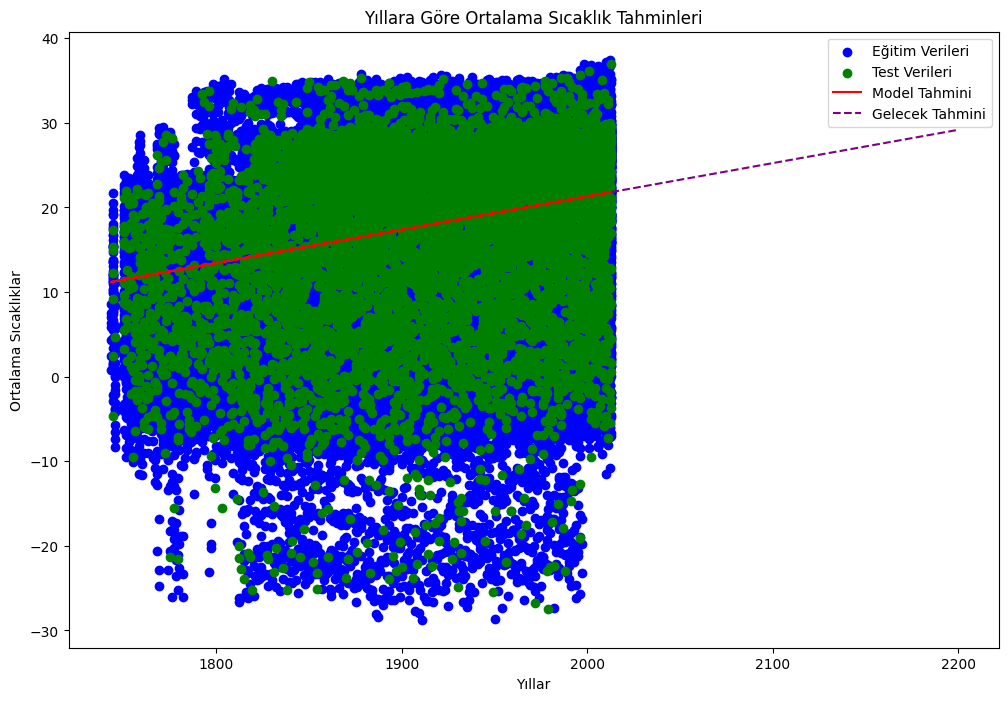

In [70]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, Y_train, color='blue', label='Eğitim Verileri')
plt.scatter(X_test, Y_test, color='green', label='Test Verileri')

plt.plot(X_train, model.predict(X_train), color='red', label='Model Tahmini') # Eğitim setindeki yıllara göre tahmin çizgisi
plt.plot(future_years, predictions, color='purple', linestyle='--', label='Gelecek Tahmini') # Gelecekteki yıllara göre tahmin çizgisi

# Grafik özellikleri
plt.title('Yıllara Göre Ortalama Sıcaklık Tahminleri')
plt.xlabel('Yıllar')
plt.ylabel('Ortalama Sıcaklıklar')
plt.legend()
plt.show()

# Model Hata değerlendirmesi

In [71]:
from sklearn.metrics import mean_squared_error
Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)

print('Mean Square Hata Oranı: '+ str(mse))
print('Root Mean Square Hata Oranı: '+ str(rmse))

Mean Square Hata Oranı: 100.08491202660512
Root Mean Square Hata Oranı: 10.004244700456159


# GÖZETİMSİZ ÖĞRENME (UNSUPERVISED LEARNING)

In [72]:
from sklearn.cluster import KMeans #Ortalama sıcaklık tahmininde KMeans modeli kullanacağım.
from sklearn.preprocessing import StandardScaler

# Sıcaklık Değerlerini KMeans ile inceleyip yorumlayabilen model oluşumu

In [73]:
X = clean_df.drop(columns=['AverageTemperature', 'dt']) # Tahmin edeceğim ortalama sıcaklık sütununu datasetten çıkarıyorum.

X['Country'] = X['Country'].astype('category').cat.codes # Kategorik verileri sayısal verilere çeviriyorum.

# Veriyi standardScaler ile ölçeklendiriyorum ve gömüyorum.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
from sklearn.metrics import silhouette_score #kaç cluster olacağını seçmek için silhouette score kullancağım.
silhouettes =[]
cluster_range= range(2,5)

In [81]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200, n_init=5, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Silhouette skoru hesapla
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouettes.append(silhouette_avg)
    print(f"Cluster Sayısı: {n_clusters}, Silhouette Skoru: {silhouette_avg:.4f}")

Cluster Sayısı: 2, Silhouette Skoru: 0.3959
Cluster Sayısı: 3, Silhouette Skoru: 0.3652
Cluster Sayısı: 4, Silhouette Skoru: 0.3622


In [ ]:
#Verilerin oluşturduğu kümeleri görselleştir
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouettes, marker='o', linestyle='--')
plt.title('Silhouette Skorlarına Göre Küme Sayısı')
plt.xlabel('Küme Sayısı')
plt.ylabel('Ortalama Silhouette Skoru')
plt.grid(True)
plt.show()